<a href="https://colab.research.google.com/github/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/blob/master/Codigos%20em%20Python/PIPGES/10_PCA_bikeflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina Estatístico
## por Cibele Russo
### ICMC/USP - São Carlos SP

# Compressão de imagens: Redução de dimensionalidade com PCA

In [96]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

In [97]:
from PIL import Image
import requests

In [98]:
url = 'https://raw.githubusercontent.com/cibelerusso/Datasets/main/bikeflower.jpeg'
bikeflower = Image.open(requests.get(url, stream=True).raw)

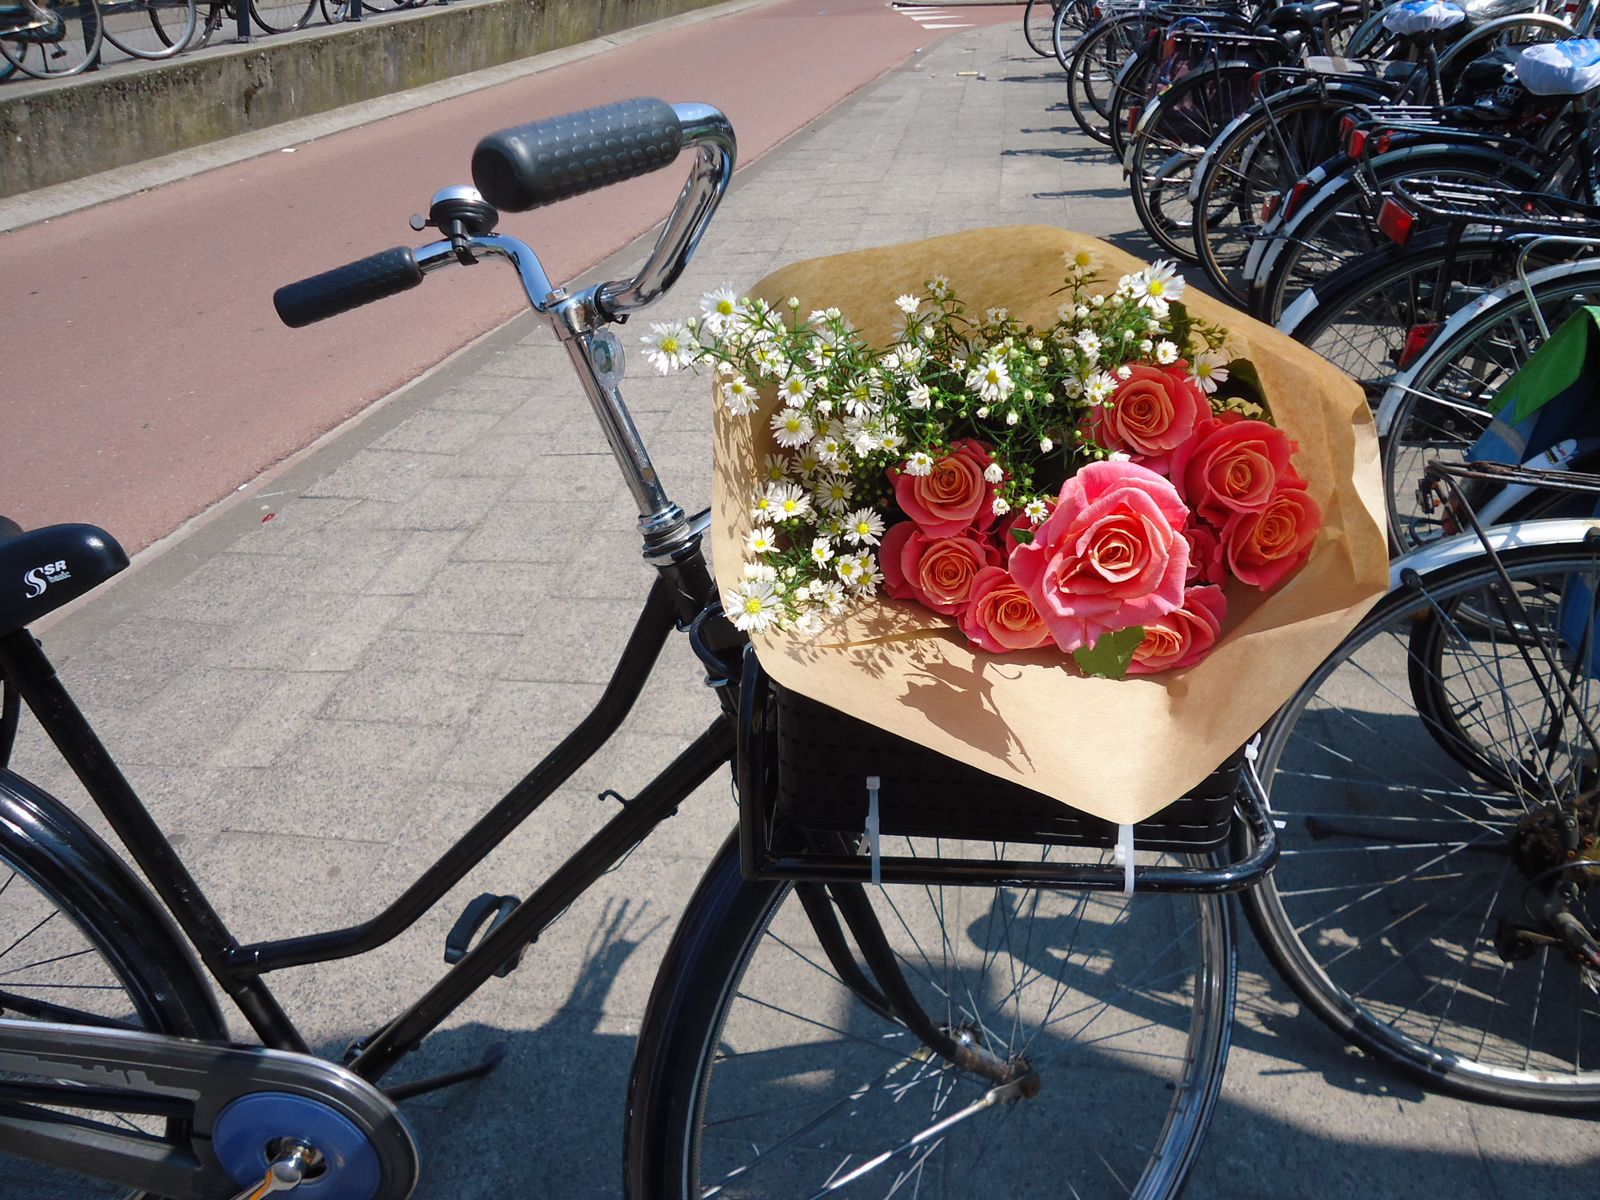

In [135]:
bikeflower

In [100]:
import skimage

bf = np.array(bikeflower)

In [89]:
bf.shape

(1200, 1600, 3)

In [124]:
bf_reshaped = bf / 255.0  # Normaliza a imagem
bf_reshaped.shape

(1200, 1600, 3)

In [131]:
# Reduza a dimensionalidade da imagem usando PCA

pca = PCA(n_components=1)
bf_pca = pca.fit_transform(bf_reshaped.reshape(-1, 3))

# Reconstrua a imagem usando os componentes principais
bf_compressed = pca.inverse_transform(bf_pca)
bf_compressed = (bf_compressed * 255).astype(np.uint8)
bf_compressed = bf_compressed.reshape(bf_reshaped.shape)

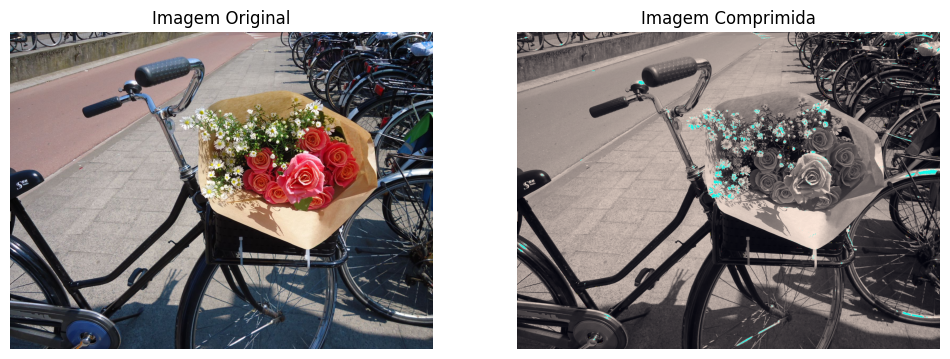

In [133]:
# Exibe a imagem original e a imagem comprimida
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(bikeflower)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagem Comprimida")
plt.imshow(bf_compressed)
plt.axis("off")

plt.show()

In [102]:
# Exercício: trabalhe com as componentes RGB

red = bf[:,:,0]
green = bf[:,:,1]
blue = bf[:,:,2]